<span style="font-size:150%">Merk: denne notebooken er ment som dokumentasjon. Skal live-kodes.</span>

# Setup

In [1]:
# TMP
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from utils import *

Using TensorFlow backend.


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#%load utils.py

# Data

*Noen ord om CIFAR10: https://www.cs.toronto.edu/~kriz/cifar.html*

*Mål: Bruke NN til å klassifisere disse 32x32x3-bildene i deres 10 ulike klasser (kategorier).*

In [4]:
trainloader, testloader = get_cifar10_pytorch(batch_size=4)

Files already downloaded and verified
Files already downloaded and verified


*Data lastes inn i batches. Best å prosessere data i batches (varians + gpu)*

In [5]:
trainloader.dataset.train_data.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


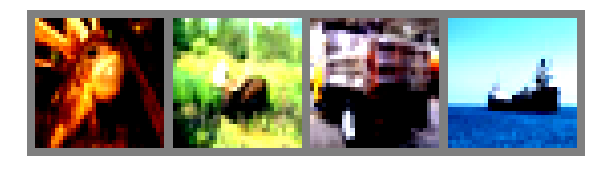

['frog', 'deer', 'truck', 'ship']


In [6]:
plot_cifar10_pytorch()

In [7]:
num_classes

10

In [8]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

# Enkelt (gammeldags) nevralt nettverk (i et hypermoderne rammeverk)

<img src="assets/pytorch.png">

*Skyte spurv med kanoner*

In [9]:
input_size = 32*32*3
hidden_size = 84

In [10]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # Gjør bildet om til en lang 32*32*3 = 3072-vektor
        x = F.tanh(self.fc1(x)) # Kjør vektoren gjennom et hidden layer og en aktiveringsfunksjon
        x = self.fc2(x) # Prediker klassen ved å kjøre gjennom output-layer
        return x

*fc1 har output* `x = tanh(dot(W, x) + b)`

<img src="assets/tanh.gif">

*Trenger bare definere `forward`-funksjon. `backward` blir automatisk opprettet.*

In [11]:
net = Net(input_size = input_size, hidden_size = hidden_size, num_classes = num_classes)

In [12]:
net

Net(
  (fc1): Linear(in_features=3072, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
#list(net.parameters())
#len(list(net.parameters()))

## Trening

Husk stegene:
1. Sett opp nevralt nettverk
2. Hent ut batch med treningsdata
3. Kjør disse gjennom nettverket for å få nettverkets prediksjoner
4. Mål avvik mellom fasit og prediskjon ved hjelp av loss-funksjon
5. Oppdater vektene ved å bruke back-propagation etterfulgt av gradient descent

*Mat inn data i nettverket:*

In [14]:
i, data = next(enumerate(trainloader, 0))

In [15]:
i

0

In [16]:
inputs, labels = data

In [17]:
len(inputs)

4

In [18]:
len(labels)

4

In [19]:
inputs[0]


(0 ,.,.) = 
  1.2928  1.2541  1.2153  ...   0.2654  0.1297 -0.1610
  0.7501  0.6338  0.5368  ...  -0.0253 -0.1416 -0.4518
 -0.2192 -0.2967 -0.3161  ...  -0.2386 -0.3161 -0.4712
           ...             ⋱             ...          
  0.1104  0.0910  0.0910  ...  -0.1029 -0.1223 -0.1610
  0.1104  0.0910  0.0910  ...  -0.1223 -0.1416 -0.1610
  0.0522  0.0522  0.0522  ...  -0.1416 -0.1804 -0.1998

(1 ,.,.) = 
  1.5348  1.4954  1.4561  ...   0.5121  0.3548  0.0794
  1.0824  0.9841  0.8858  ...   0.2564  0.1188 -0.1566
  0.1778  0.0991  0.0794  ...   0.0598 -0.0189 -0.1172
           ...             ⋱             ...          
  0.6104  0.5908  0.5908  ...   0.3351  0.3154  0.2761
  0.6104  0.5908  0.5908  ...   0.3154  0.2958  0.2761
  0.5514  0.5514  0.5318  ...   0.2761  0.2564  0.2368

(2 ,.,.) = 
  1.9928  1.9343  1.8953  ...   0.7052  0.6076  0.3735
  1.4661  1.3685  1.2709  ...   0.4515  0.3540  0.1394
  0.4905  0.4320  0.3930  ...   0.2759  0.1979  0.1198
           ...            

In [20]:
labels


 8
 3
 6
 7
[torch.LongTensor of size 4]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


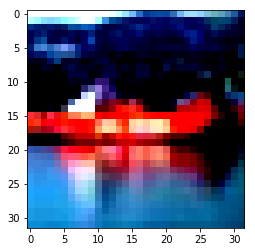

In [21]:
plt.imshow(np.transpose(torchvision.utils.make_grid(inputs[0]).numpy(), (1,2,0)))
plt.show()

In [22]:
classes[labels[0]]

'ship'

*Vi kan teste hvor godt vårt utrente nettverk med random vekter gjør det på de 10.000 testbildene. Forventer treffsikkerhet på 1/10:*

In [23]:
check_accuracy(net)

Accuracy til nettverket på de 10.000 testbildene: 12 %


*La oss mate bildene inn i nettverket. (Må wrappes i `Variable`.)*

In [24]:
inputs, labels = Variable(inputs), Variable(labels)

*Forward: Finner prediksjoner på bildene.*

In [25]:
outputs = net(inputs)

*Velg en loss-funksjon*

In [26]:
criterion = nn.CrossEntropyLoss()

*Regn ut loss:*

In [27]:
loss = criterion(outputs, labels)

In [28]:
loss

Variable containing:
 2.1470
[torch.FloatTensor of size 1]

*Backward: Finner alle vektenes bidrag til loss via backpropagation (automatisk derivasjon).*

In [29]:
loss.backward()

*Oppdaterer vektene ved å bruke SGD:*

`weight = weight - learning_rate * gradient`

In [30]:
learning_rate = 0.001

In [31]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

*Optimering: Bruker SGD til å modifisere alle vektene litt (med satt learning rate).*

In [32]:
optimizer.step()

*Nå har vi trent nettet bittelitt. Tester accuracy på nytt:*

In [33]:
check_accuracy(net)

Accuracy til nettverket på de 10.000 testbildene: 12 %


*Gjentar prosessen med neste batch av 4 bilder:*

In [34]:
i, data = next(enumerate(trainloader, 0))
inputs, labels = data
inputs, labels = Variable(inputs), Variable(labels)

In [35]:
# Må nulle ut gradientene mellom hver gang, ellers akkumuleres de:
optimizer.zero_grad()

In [36]:
outputs = net(inputs)

In [37]:
loss = criterion(outputs, labels)

In [38]:
loss

Variable containing:
 2.5182
[torch.FloatTensor of size 1]

In [39]:
loss.backward()

In [40]:
optimizer.step()

In [41]:
check_accuracy(net)

Accuracy til nettverket på de 10.000 testbildene: 13 %


*Kan gjøre dette om og om igjen:*

In [42]:
i, data = next(enumerate(trainloader, 0))
inputs, labels = data
inputs, labels = Variable(inputs), Variable(labels)
optimizer.zero_grad()
outputs = net(inputs)
loss = criterion(outputs, labels)
print(f"Loss: {loss}")
loss.backward()
optimizer.step()
check_accuracy(net)

Loss: Variable containing:
 2.4694
[torch.FloatTensor of size 1]

Accuracy til nettverket på de 10.000 testbildene: 13 %


*Tungvint... Krever mange manuelle gjennomkjøringer.. Hvor mange? Antall bilder:*

In [43]:
len(trainloader.dataset)

50000

*Antall batches på 4 hver:*

In [44]:
len(trainloader.dataset)/4

12500.0

*Må kjøre blokken over 12500 ganger for å komme én gang gjennom treningsdata.. Bedre å lage en loop:*

In [45]:
# Antall ganger gjennom hele treningsdatasettet
num_epochs = 2

In [ ]:
# %load loop.py
for epoch in range(num_epochs): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print hver 2000-ende batch         
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            check_accuracy(net)
            running_loss = 0.0

print('Ferdig')

<img src="assets/tommelopp.png">

# Samme nettverk i Keras (og på GPU)

<img src="assets/kerastf.png">

In [ ]:
!nvidia-smi

In [47]:
(x_train, y_train), (x_test, y_test) = get_cifar10_keras()

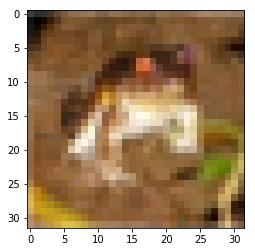

In [48]:
plt.imshow(x_train[0])
plt.show()

In [49]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

Definer nettverket:

In [50]:
input_size = 32*32*3
hidden_size = 84

In [51]:
model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(hidden_size, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                258132    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                850       
Total params: 258,982
Trainable params: 258,982
Non-trainable params: 0
_________________________________________________________________


In [53]:
learning_rate = 0.001

In [54]:
opt = keras.optimizers.sgd(lr=learning_rate)

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
              batch_size=4,
              epochs=1,
              validation_data=(x_test, y_test))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.fit(x_train, y_train,
              batch_size=4,
              epochs=4,
              validation_data=(x_test, y_test))

# Et moderne nettverk

In [56]:
model = Sequential()


model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [57]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) # 65% etter 2 epoker

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
              batch_size=4,
              epochs=2,
              validation_data=(x_test, y_test))

*Forklar elementene i nettverket. Konvolusjoner, max-pooling, dropout etc*

*Vi kunne dratt inn mange triks for å booste dette. Data augmentation, ensembling, hyperparametertuning, etc. Men vi kan ikke dekke alt på 90 minutter! :-)*

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=5,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True  
)

model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=4), epochs=2,
                                    validation_data=(x_test, y_test))

# Et _hypermoderne_ nettverk

*DenseNet*

*Pre-trent på ImageNet*

In [59]:
(x_train, y_train), (x_test, y_test) = get_data_dn121(allData=False)

Lastet inn data, konverterte til størrelse egnet for DenseNet121
allData=False, så kun 3000 treningseksempler ble lastet inn


In [60]:
model = densenet121_model()

In [ ]:
#model.summary()

In [61]:
model.fit(x_train, y_train, 
          batch_size=16, 
          epochs=1,
          validation_data=(x_test, y_test),
          )

Train on 3000 samples, validate on 100 samples
Epoch 1/1
3000/3000 [==============================] - 51s 17ms/step - loss: 1.0852 - acc: 0.6277 - val_loss: 0.6831 - val_acc: 0.7900


*Ser lovende ut, selv med bare 3.000 treningsbilder! Men tar lang tid... Vi laster heller inn noe jeg har trent i noen timer (på en Titan V). Med alle 50.000 treningsbilder, 10 epoker. Ellers nøyaktig samme som over:*

In [62]:
(x_train, y_train), (x_test, y_test) = get_data_dn121(allData=True)

Lastet inn data, konverterte til størrelse egnet for DenseNet121
Lastet inn alle 50000 treningseksempler.


In [63]:
model = densenet121_pretrained()

Laster inn pre-trent DenseNet121....
Modell lastet inn


In [64]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 37s 4ms/step


[0.1406581050252542, 0.9595]

*Knuser altså alle resultatene vi fikk over, og gjør Cifar10 omtrent ubrukelig som benchmark!*

# Mer interessant anvendelse

Gå til `2.0-medisinske-bilder.ipynb`

Men først: shut down for å frigjøre regneressurser.

<img src="assets/shutdown.png">